# BANK LOAN PREDICTION

This case is about a bank (Thera Bank) whose management wants to explore ways of 
converting its liability customers to personal loan customers (while retaining them as 
depositors). A campaign that the bank ran last year for liability customers showed a 
healthy conversion rate of over 9% success. This has encouraged the retail marketing 
department to devise campaigns with better target marketing to increase the success 
ratio with minimal budget.


## ATTRIBUTE INFORMATION: <br>
 ID : Customer ID <br>
 Age : Customer's age in completed years <br>
 Experience : #years of professional experience <br>
 Income : Annual income of the customer  <br>
 ZIP Code : Home Address ZIP code. <br>
 Family : Family size of the customer <br>
 CCAvg : Avg. spending on credit cards per month  <br>
 Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
 Mortgage : Value of house mortgage if any. <br>
 Personal Loan : Did this customer accept the personal loan offered in the last campaign? <br>
 Securities Account : Does the customer have a securities account with the bank? <br>
 CD Account : Does the customer have a certificate of deposit (CD) account with the bank? <br>
 Online : Does the customer use internet banking facilities? <br>
 Credit card : Does the customer use a credit card issued by UniversalBank? <br>

In [3]:
import  numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.shape

(5000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


### CHECKING MISSING VALUE

In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
data=data.drop('ID',axis=1)

In [13]:
data.head(20)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### CORRELATION BETWEEN VARIABLES

In [14]:
data.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In above table positive value indicates the positive correlation between variables,
negative value represents negative correlation among variables
and zero represents no relationship between variables.

<AxesSubplot:>

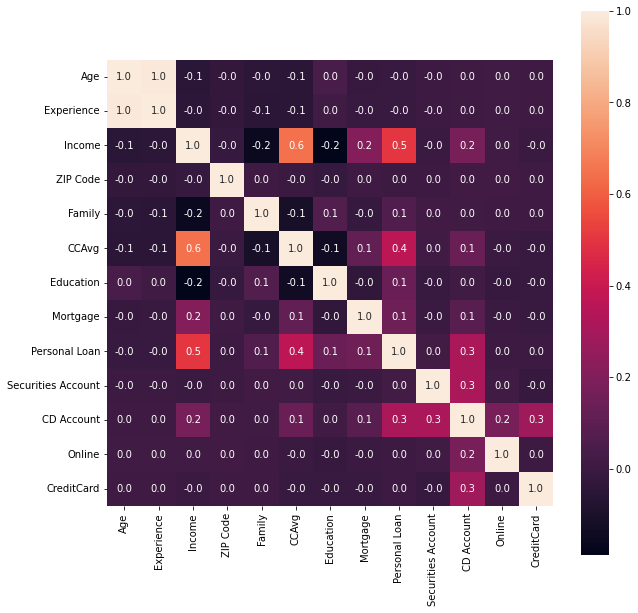

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,square=True,fmt='.1f')

In [15]:
data=data.drop('Age',axis=1)

In [16]:
x=data.drop('Personal Loan',axis=1)

In [17]:
y=data['Personal Loan']

In [18]:
x.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,49,91107,4,1.6,1,0,1,0,0,0
1,19,34,90089,3,1.5,1,0,1,0,0,0
2,15,11,94720,1,1.0,1,0,0,0,0,0
3,9,100,94112,1,2.7,2,0,0,0,0,0
4,8,45,91330,4,1.0,2,0,0,0,0,1


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### SPLITTING THE DATA INTO TRAIN AND TEST

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [22]:
x_train.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,22,35,94304,2,1.3,1,0,0,0,1,0
4768,14,39,93118,1,2.0,2,0,0,0,1,0
65,35,131,91360,1,3.8,1,0,0,0,1,1
177,3,65,94132,4,1.8,2,244,0,0,0,0
4489,13,21,95518,3,0.2,2,0,0,0,1,0


In [23]:
y_train.head()

1334    0
4768    0
65      0
177     0
4489    0
Name: Personal Loan, dtype: int64

### LOGISTIC REGRESSION

In [24]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [25]:
model1=model.score(x_train,y_train)

In [26]:
model1

0.9091428571428571

In [27]:
model2=model.score(x_test,y_test)

In [28]:
model2

0.9073333333333333

In [29]:
y_predict=model.predict(x_test)#for given x we have to predict y thats y we take x test

#### CONFUSION MATRIX

In [30]:
cm=metrics.confusion_matrix(y_test,y_predict)

In [31]:
cm

array([[1318,   33],
       [ 106,   43]], dtype=int64)

### NAIVE BAYES

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gaussian=GaussianNB()

In [34]:
gaussian.fit(x_train,y_train)

GaussianNB()

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [35]:
model3=gaussian.score(x_train,y_train)

In [36]:
model3

0.8948571428571429

In [37]:
model4=gaussian.score(x_test,y_test)

In [38]:
model4

0.8833333333333333

#### CONFUSION MATRIX

In [39]:
cm1=metrics.confusion_matrix(y_test,y_predict)

In [40]:
cm1

array([[1318,   33],
       [ 106,   43]], dtype=int64)

### K NEAREST NEIGHBOR CLASSIFIER

In [41]:
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [42]:
xscaled=x.apply(zscore)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.30,random_state=1)

In [44]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

#### SCORE ( IN SAMPLE R^2 , OUT SAMPLE R^2 )

In [45]:
model5=knn.score(x_train,y_train)

In [46]:
model5

1.0

In [47]:
model6=knn.score(x_test,y_test)

In [48]:
model6

0.95

In [49]:
y_predict=knn.predict(x_test)

#### CONFUSION MATRIX

In [50]:
cm=metrics.confusion_matrix(y_test,y_predict)

In [51]:
cm

array([[1339,   12],
       [  63,   86]], dtype=int64)

In [24]:
result=pd.DataFrame({'CLASSIFIER':['LOGISTIC REGRESSION','NAIVE BAYES','K NEAREST NEIGHBOR'],'SCORES':[0.9091428,0.8948571,1.0]})

In [25]:
result

,CLASSIFIER,SCORES
0,LOGISTIC REGRESSION,0.909143
1,NAIVE BAYES,0.894857
2,K NEAREST NEIGHBOR,1.000000


# CONCLUSION :

#### Out of above three classifier" K NEAREST NEIGHBOR "shows highest score .It means k nearest neighbors train our model 
#### with highest accuracy.

#### The advantage of using k nearest neighbors is:
    1.Time complexity is 0(n).
    2.Can make predictions without training.
    3.can be used for both classification and regression.